# **Data Cleaning**

## Objectives

* Data Analysis with ProfileReport
* Correlation and PPS Study
* In-depth Assessment of Missing Data
* Imputation Techniques for Missing Data
* Train and Test Set Partitioning

## Inputs

* outputs/datasets/collection/housing_records.csv

## Outputs

* Generate cleaned train and test sets, saved under outputs/datasets/cleaning

In [1]:
# import all necessary packages and libraries for the notebook
import os
import pandas as pd
from ydata_profiling import ProfileReport
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ppscore as pps
sns.set_style("darkgrid") # Dark background

---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [2]:
current_dir = os.getcwd()
current_dir

'/workspace/PP5-Predictive-Analytics/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [3]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [4]:
current_dir = os.getcwd()
current_dir

'/workspace/PP5-Predictive-Analytics'

---

# Load Data:

Load Data

In [5]:
df_raw_path = "outputs/dataset/housing_records.csv"
df = pd.read_csv(df_raw_path)
df.head(3)

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,EnclosedPorch,GarageArea,GarageFinish,...,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,SalePrice
0,856,854.0,3.0,No,706,GLQ,150,0.0,548,RFn,...,65.0,196.0,61,5,7,856,0.0,2003,2003,208500
1,1262,0.0,3.0,Gd,978,ALQ,284,NaN,460,RFn,...,80.0,0.0,0,8,6,1262,NaN,1976,1976,181500
2,920,866.0,3.0,Mn,486,GLQ,434,0.0,608,RFn,...,68.0,162.0,42,5,7,920,NaN,2001,2002,223500


---

# Data Exploration:

Distribution of Numerical features

In [6]:
pandas_report = ProfileReport(df=df, minimal=True)
pandas_report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

---

# Correlation and PPS Analysis: 

Correlation matrix

In [7]:
def generate_heatmap(dataframe, threshold, figsize=(20, 12), font_size=8):
    if len(dataframe.columns) > 1:
        mask = np.zeros_like(dataframe, dtype=bool)
        mask[np.triu_indices_from(mask)] = True
        mask[abs(dataframe) < threshold] = True

        fig, ax = plt.subplots(figsize=figsize)
        sns.heatmap(dataframe, annot=True, xticklabels=True, yticklabels=True,
                    mask=mask, cmap='viridis', annot_kws={"size": font_size}, ax=ax,
                    linewidth=0.5)
        ax.set_yticklabels(dataframe.columns, rotation=0)
        plt.ylim(len(dataframe.columns), 0)
        plt.show()

def generate_pps_heatmap(dataframe, threshold, figsize=(20, 12), font_size=8):
    if len(dataframe.columns) > 1:
        mask = np.zeros_like(dataframe, dtype=bool)
        mask[abs(dataframe) < threshold] = True

        fig, ax = plt.subplots(figsize=figsize)
        sns.heatmap(dataframe, annot=True, xticklabels=True, yticklabels=True,
                    mask=mask, cmap='rocket_r', annot_kws={"size": font_size},
                    linewidth=0.05, linecolor='grey')
        plt.ylim(len(dataframe.columns), 0)
        plt.show()

def compute_correlations_and_pps(dataframe):
    corr_spearman = dataframe.corr(method="spearman")
    corr_pearson = dataframe.corr(method="pearson")

    pps_matrix_raw = pps.matrix(dataframe)
    pps_matrix = pps_matrix_raw.pivot(index='y', columns='x', values='ppscore')

    pps_stats = pps_matrix_raw.query("ppscore < 1")['ppscore'].describe().T
    print("PPS threshold - review PPS score IQR to decide threshold for heatmap \n")
    print(pps_stats.round(3))

    return corr_pearson, corr_spearman, pps_matrix

def display_correlation_and_pps(pearson_corr, spearman_corr, pps_matrix, corr_threshold, pps_threshold,
                                figsize=(20, 12), font_size=8):
    print("\n")
    print("* Evaluate how your target variable is correlated with other variables (features and target)")
    print("* Analyze multicollinearity, that is, how features are correlated among themselves")

    print("\n")
    print("*** Heatmap: Spearman Correlation ***")
    print("This assesses monotonic relationships \n")
    generate_heatmap(dataframe=spearman_corr, threshold=corr_threshold, figsize=figsize, font_size=font_size)

    print("\n")
    print("*** Heatmap: Pearson Correlation ***")
    print("This assesses the linear relationship between two continuous variables \n")
    generate_heatmap(dataframe=pearson_corr, threshold=corr_threshold, figsize=figsize, font_size=font_size)

    print("\n")
    print("*** Heatmap: Power Predictive Score (PPS) ***")
    print("PPS detects linear or non-linear relationships between two columns.\n"
          "The score ranges from 0 (no predictive power) to 1 (perfect predictive power) \n")
    generate_pps_heatmap(dataframe=pps_matrix, threshold=pps_threshold, figsize=figsize, font_size=font_size)

In [8]:
pearson_corr, spearman_corr, pps_matrix = compute_correlations_and_pps(df)

/workspace/.pip-modules/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"
/workspace/.pip-modules/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"
/workspace/.pip-modules/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"
/workspace/.pip-modules/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"
/workspa

PPS threshold - review PPS score IQR to decide threshold for heatmap 

count    552.000
mean       0.055
std        0.104
min        0.000
25%        0.000
50%        0.000
75%        0.066
max        0.702
Name: ppscore, dtype: float64




* Evaluate how your target variable is correlated with other variables (features and target)
* Analyze multicollinearity, that is, how features are correlated among themselves


*** Heatmap: Spearman Correlation ***
This assesses monotonic relationships 



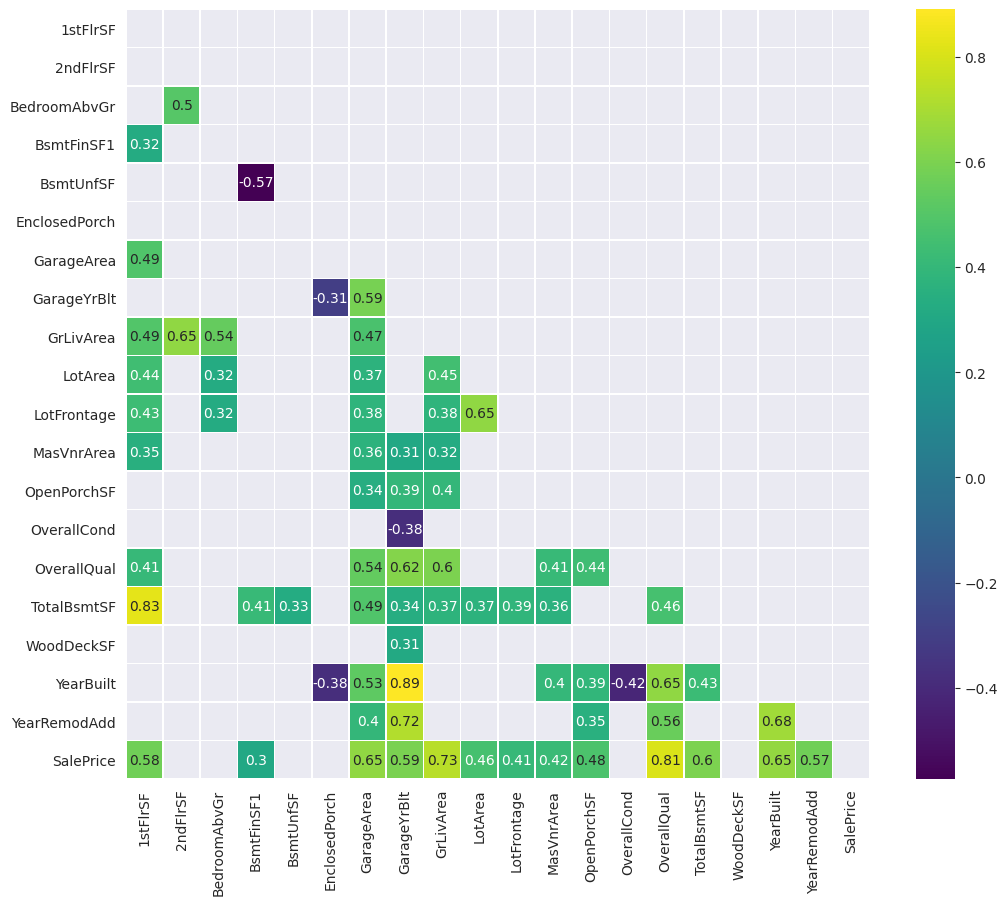



*** Heatmap: Pearson Correlation ***
This assesses the linear relationship between two continuous variables 



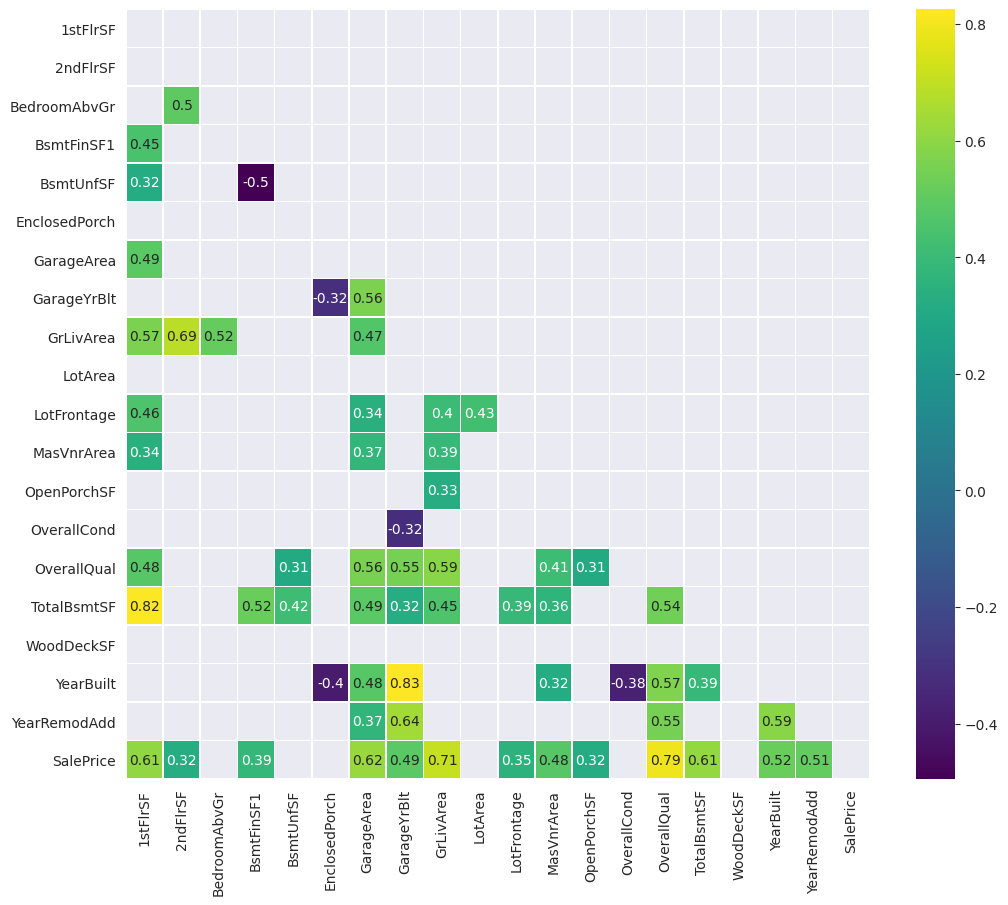



*** Heatmap: Power Predictive Score (PPS) ***
PPS detects linear or non-linear relationships between two columns.
The score ranges from 0 (no predictive power) to 1 (perfect predictive power) 



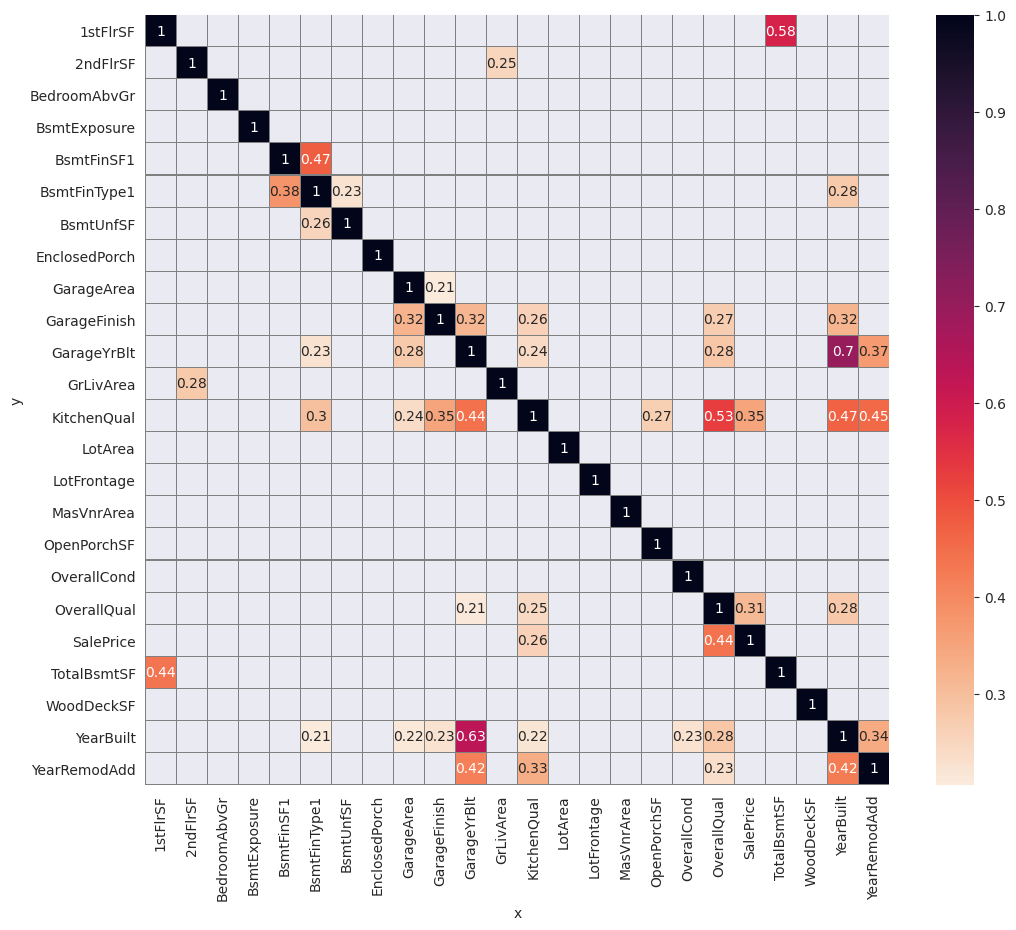

In [9]:
display_correlation_and_pps(pearson_corr = pearson_corr,
                  spearman_corr = spearman_corr,
                  pps_matrix = pps_matrix,
                  corr_threshold = 0.3, pps_threshold = 0.2,
                  figsize=(12,10), font_size = 10)

---

# Reports on missing data:

In [10]:
vars_with_missing_data = df.columns[df.isna().sum() > 0].to_list()
vars_with_missing_data

['2ndFlrSF',
 'BedroomAbvGr',
 'BsmtFinType1',
 'EnclosedPorch',
 'GarageFinish',
 'GarageYrBlt',
 'LotFrontage',
 'MasVnrArea',
 'WoodDeckSF']

In [11]:
if vars_with_missing_data:
    profile = ProfileReport(df=df[vars_with_missing_data], minimal=True)
    profile.to_notebook_iframe()
else:
    print("There are no variables with missing data")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [12]:
def EvaluateMissingData(df):
    missing_data_absolute = df.isnull().sum()
    missing_data_percentage = round(missing_data_absolute/len(df)*100, 2)
    df_missing_data = (pd.DataFrame(
        data={"RowsWithMissingData": missing_data_absolute,
              "PercentageOfDataset": missing_data_percentage,
              "DataType": df.dtypes}
    )
                       .sort_values(by=['PercentageOfDataset'], ascending=False)
                       .query("PercentageOfDataset > 0")
                      )
    return df_missing_data
    

In [13]:
EvaluateMissingData(df)

,RowsWithMissingData,PercentageOfDataset,DataType
EnclosedPorch,1324,90.68,float64
WoodDeckSF,1305,89.38,float64
LotFrontage,259,17.74,float64
GarageFinish,162,11.10,object
BsmtFinType1,114,7.81,object
BedroomAbvGr,99,6.78,float64
2ndFlrSF,86,5.89,float64
GarageYrBlt,81,5.55,float64
MasVnrArea,8,0.55,float64


<AxesSubplot:xlabel='GarageFinish', ylabel='SalePrice'>

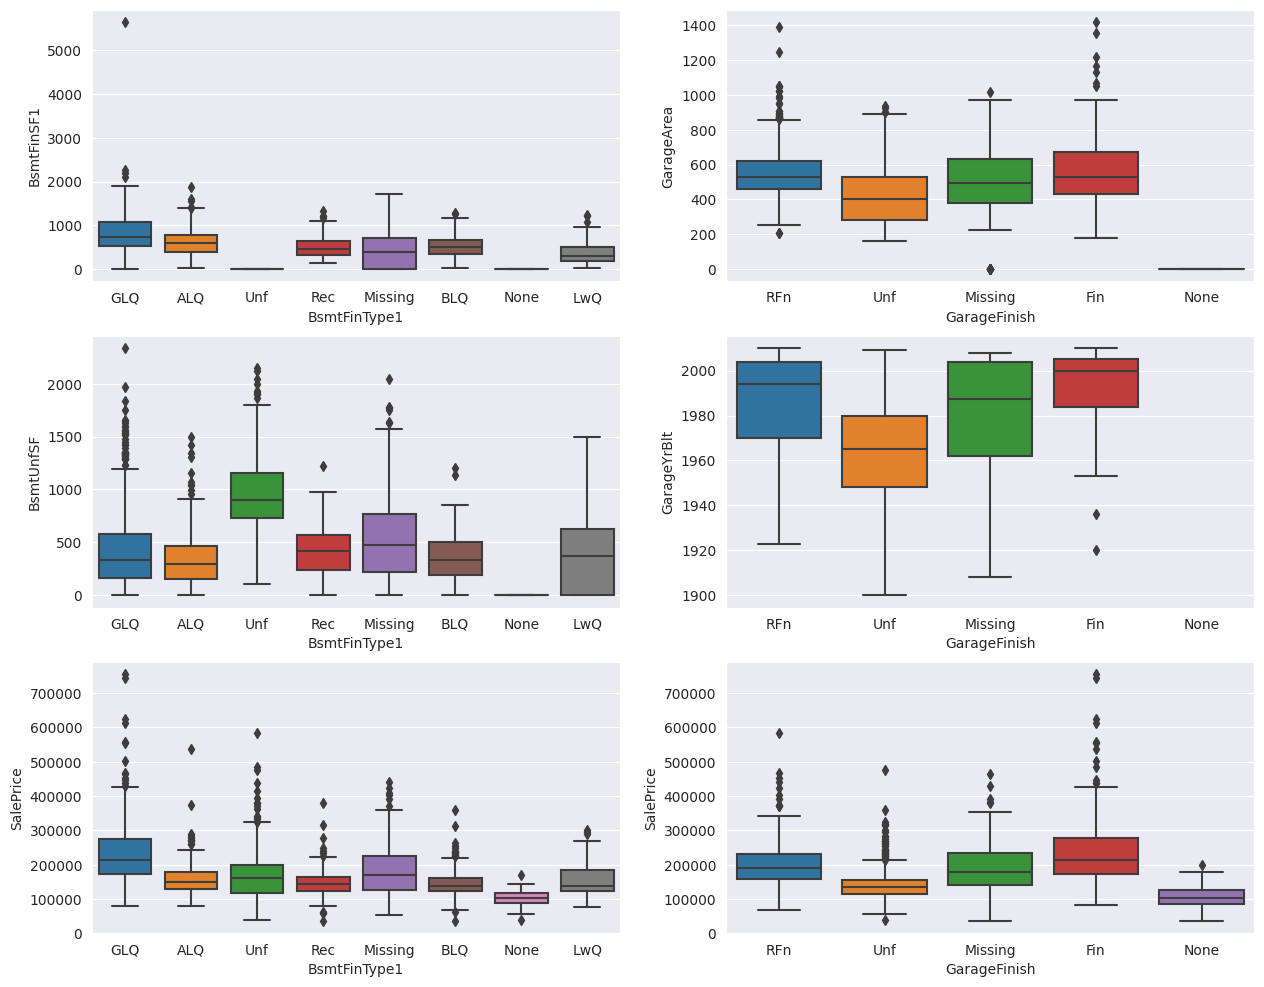

In [19]:
df_missing = df.copy()
df_missing['BsmtFinType1']=df_missing['BsmtFinType1'].fillna('Missing')
df_missing['GarageFinish']=df_missing['GarageFinish'].fillna('Missing')

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15,12))
sns.boxplot(data=df_missing, x='BsmtFinType1', y='BsmtFinSF1', ax=axes[0,0])
sns.boxplot(data=df_missing, x='BsmtFinType1', y='BsmtUnfSF', ax=axes[1,0])
sns.boxplot(data=df_missing, x='BsmtFinType1', y='SalePrice', ax=axes[2,0])

sns.boxplot(data=df_missing, x='GarageFinish', y='GarageArea', ax=axes[0,1])
sns.boxplot(data=df_missing, x='GarageFinish', y='GarageYrBlt', ax=axes[1,1])
sns.boxplot(data=df_missing, x='GarageFinish', y='SalePrice', ax=axes[2,1])

In [20]:
def analyze_data_cleaning_effect(original_df, cleaned_df, variables_to_check):

    plot_number = 1  # To keep track of the plot numbers
    
    # Differentiate between numerical and categorical variables
    categorical_vars = original_df.select_dtypes(exclude=['number']).columns 

    # Iterate over the specified variables to visualize the effect of data cleaning
    for variables in [variables_to_check]:
        print("\n=====================================================================================")
        print(f"* Distribution Effect Analysis Post Data Cleaning on the following variables:")
        print(f"{variables} \n\n")
    
        for variable in variables:
            if variable in categorical_vars:  # If the variable is categorical, create a barplot
                
                df_original = pd.DataFrame({"Type": "Original", "Value": original_df[variable]})
                df_cleaned = pd.DataFrame({"Type": "Cleaned", "Value": cleaned_df[variable]})
                combined_df = pd.concat([df_original, df_cleaned], axis=0)
                
                fig, ax = plt.subplots(figsize=(15, 5))
                sns.countplot(hue='Type', data=combined_df, x="Value", palette=['#432371', "#FAAE7B"], ax=ax)
                ax.set(title=f"Distribution Plot {plot_number}: {variable}")
                plt.xticks(rotation=90)
                plt.legend()

            else:  # If the variable is numerical, create a histogram

                fig, ax = plt.subplots(figsize=(10, 5))
                sns.histplot(data=original_df, x=variable, color="#432371", label='Original', kde=True, element="step", ax=ax)
                sns.histplot(data=cleaned_df, x=variable, color="#FAAE7B", label='Cleaned', kde=True, element="step", ax=ax)
                ax.set(title=f"Distribution Plot {plot_number}: {variable}")
                plt.legend()

            plt.show()
            plot_number += 1

# Drop Variables 

In [21]:
from feature_engine.selection import DropFeatures

variables_method = ['EnclosedPorch', 'WoodDeckSF']
variables_method

imputer = DropFeatures(features_to_drop=variables_method)
df_method = imputer.fit_transform(df)
df_method.head(5)

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,GarageArea,GarageFinish,GarageYrBlt,...,LotArea,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,YearBuilt,YearRemodAdd,SalePrice
0,856,854.0,3.0,No,706,GLQ,150,548,RFn,2003.0,...,8450,65.0,196.0,61,5,7,856,2003,2003,208500
1,1262,0.0,3.0,Gd,978,ALQ,284,460,RFn,1976.0,...,9600,80.0,0.0,0,8,6,1262,1976,1976,181500
2,920,866.0,3.0,Mn,486,GLQ,434,608,RFn,2001.0,...,11250,68.0,162.0,42,5,7,920,2001,2002,223500
3,961,NaN,NaN,No,216,ALQ,540,642,Unf,1998.0,...,9550,60.0,0.0,35,5,7,756,1915,1970,140000
4,1145,NaN,4.0,Av,655,GLQ,490,836,RFn,2000.0,...,14260,84.0,350.0,84,5,8,1145,2000,2000,250000



* Distribution Effect Analysis Post Data Cleaning on the following variables:
['2ndFlrSF', 'MasVnrArea'] 




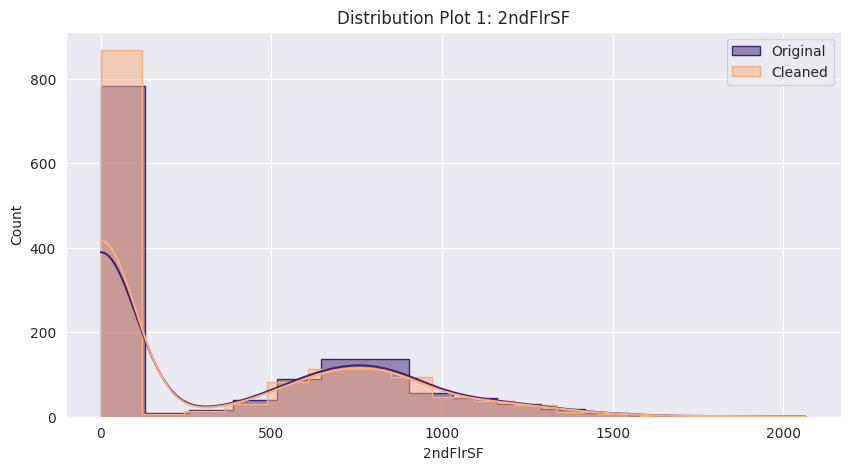

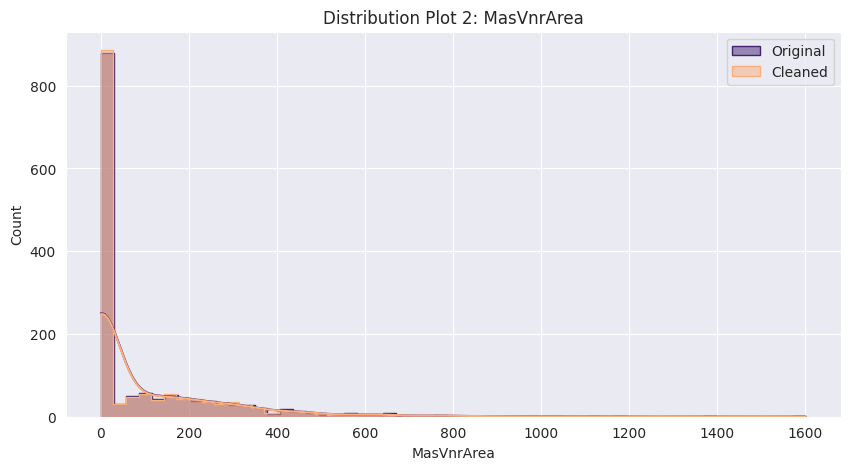

In [24]:
from feature_engine.imputation import ArbitraryNumberImputer

variables_method = ['2ndFlrSF', 'MasVnrArea']
variables_method

imputer = ArbitraryNumberImputer(arbitrary_number=0, variables=variables_method)
df_method = imputer.fit_transform(df)

analyze_data_cleaning_effect(original_df=df,
                   cleaned_df=df_method,
                   variables_to_check=variables_method)

---


* Distribution Effect Analysis Post Data Cleaning on the following variables:
['BsmtFinType1', 'GarageFinish'] 




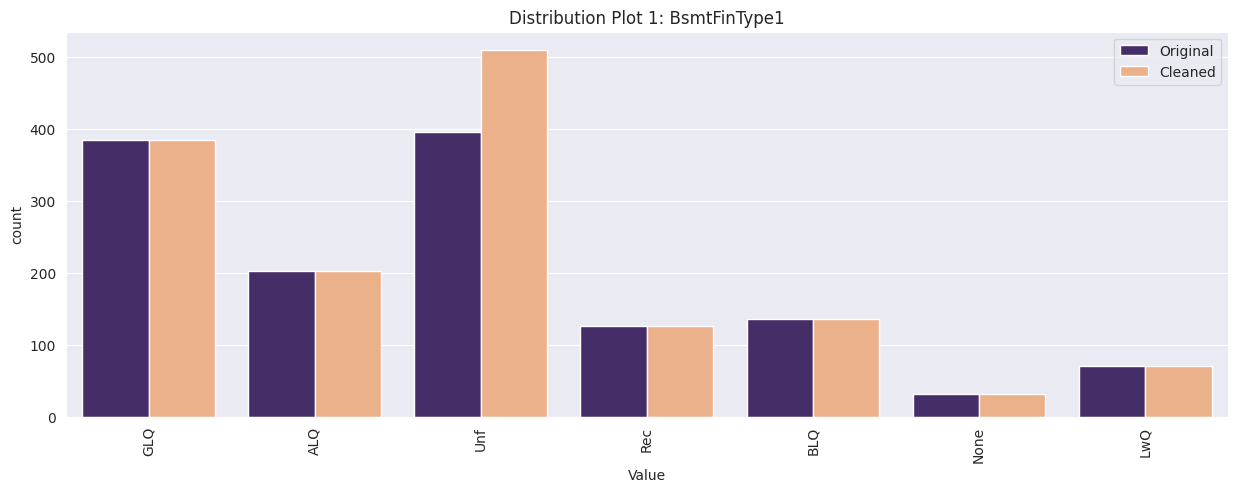

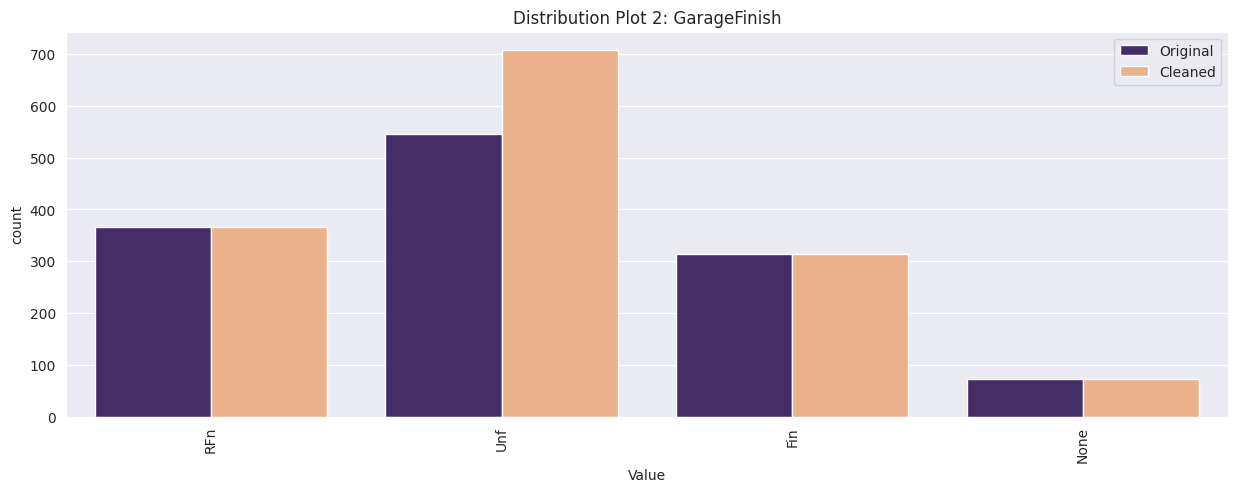

In [25]:
from feature_engine.imputation import CategoricalImputer

variables_method = ['BsmtFinType1', 'GarageFinish']
variables_method

imputer = CategoricalImputer(imputation_method='missing', fill_value='Unf', variables=variables_method)
df_method = imputer.fit_transform(df)

analyze_data_cleaning_effect(original_df=df,
                   cleaned_df=df_method,
                   variables_to_check=variables_method)


* Distribution Effect Analysis Post Data Cleaning on the following variables:
['BedroomAbvGr', 'GarageYrBlt', 'LotFrontage'] 




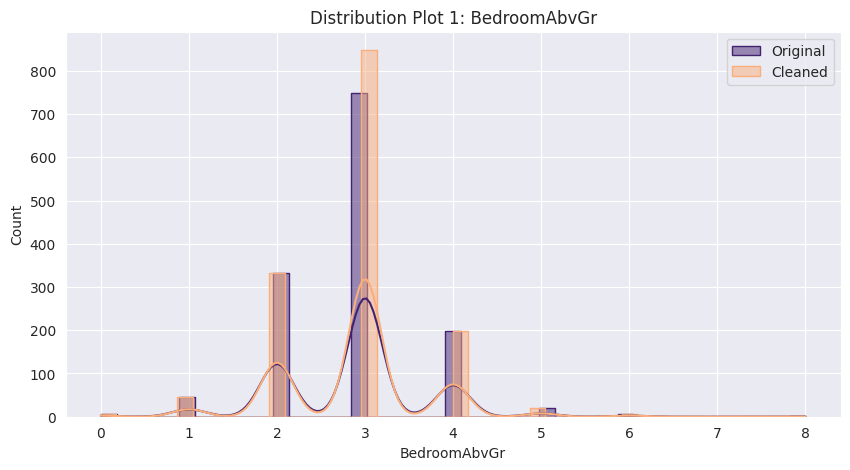

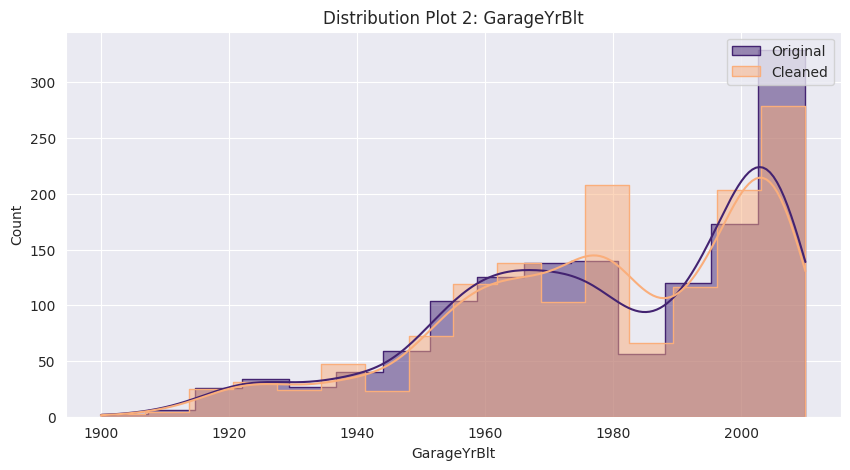

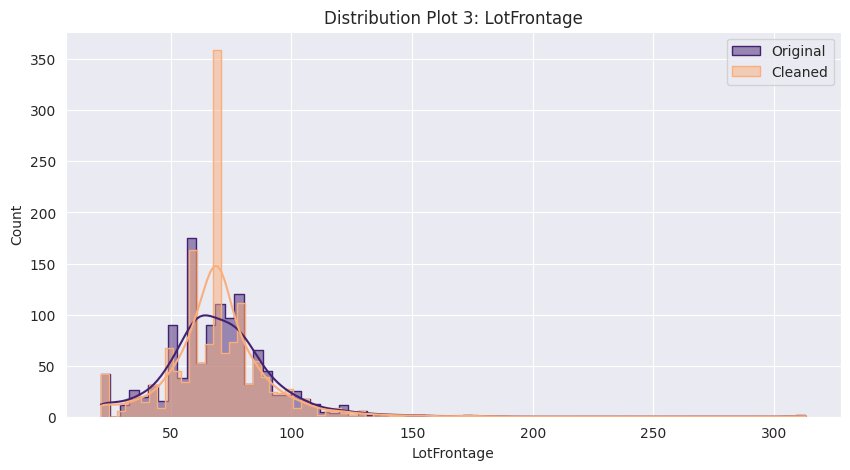

In [26]:
from feature_engine.imputation import MeanMedianImputer

variables_method = ['BedroomAbvGr', 'GarageYrBlt', 'LotFrontage']
variables_method

imputer = MeanMedianImputer(imputation_method='median', variables=variables_method)
df_method = imputer.fit_transform(df)

analyze_data_cleaning_effect(original_df=df,
                   cleaned_df=df_method,
                   variables_to_check=variables_method)

In [27]:
from sklearn.model_selection import train_test_split

TrainSet, TestSet, _, __ = train_test_split(
                                        df,
                                        df['SalePrice'],
                                        test_size=0.2,
                                        random_state=0)

print(f"TrainSet shape: {TrainSet.shape} \nTestSet shape: {TestSet.shape}")

TrainSet shape: (1168, 24) 
TestSet shape: (292, 24)


In [28]:
# Drop Variables ['EnclosedPorch', 'WoodDeckSF']
variables_method = ['EnclosedPorch', 'WoodDeckSF']
imputer = DropFeatures(features_to_drop=variables_method)
imputer.fit(TrainSet)
TrainSet, TestSet = imputer.transform(TrainSet), imputer.transform(TestSet)

# ArbitraryNumberImputer 
variables_method = ['2ndFlrSF','MasVnrArea']
imputer = ArbitraryNumberImputer(arbitrary_number=0, variables=variables_method)
imputer.fit(TrainSet)
TrainSet, TestSet = imputer.transform(TrainSet) , imputer.transform(TestSet)

# CategoricalImputer
variables_method = ['BsmtFinType1', 'GarageFinish']
imputer = CategoricalImputer(imputation_method='missing', fill_value='Unf', variables=variables_method)
imputer.fit(TrainSet)
TrainSet, TestSet = imputer.transform(TrainSet) , imputer.transform(TestSet)

# MeanMedianImputer
variables_method = ['BedroomAbvGr', 'GarageYrBlt', 'LotFrontage']
imputer = MeanMedianImputer(imputation_method='median', variables=variables_method)
imputer.fit(TrainSet)
TrainSet, TestSet = imputer.transform(TrainSet) , imputer.transform(TestSet)

In [29]:
df_missing_data = EvaluateMissingData(TrainSet)
print(f"* There are {df_missing_data.shape[0]} variables with missing data \n")
df_missing_data

* There are 0 variables with missing data 



,RowsWithMissingData,PercentageOfDataset,DataType


In [30]:
from sklearn.pipeline import Pipeline
from feature_engine.selection import DropFeatures
from feature_engine.imputation import MeanMedianImputer
from feature_engine.imputation import CategoricalImputer
from feature_engine.imputation import ArbitraryNumberImputer


data_cleaning_pipeline = Pipeline([
      ( 'DropFeatures', DropFeatures(features_to_drop=['EnclosedPorch', 'WoodDeckSF']) ),
      ( 'MeanMedianImputer', MeanMedianImputer(imputation_method='median', variables=['BedroomAbvGr', 'GarageYrBlt', 'LotFrontage']) ),
      ( 'CategoricalImputer', CategoricalImputer(imputation_method='missing', fill_value='Unf', variables=['BsmtFinType1', 'GarageFinish']) ),
      ( 'ArbitraryNumberImputer', ArbitraryNumberImputer(arbitrary_number=0, variables=['2ndFlrSF','MasVnrArea']) ),
])

df = data_cleaning_pipeline.fit_transform(df)
df.head()


,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,GarageArea,GarageFinish,GarageYrBlt,...,LotArea,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,YearBuilt,YearRemodAdd,SalePrice
0,856,854.0,3.0,No,706,GLQ,150,548,RFn,2003.0,...,8450,65.0,196.0,61,5,7,856,2003,2003,208500
1,1262,0.0,3.0,Gd,978,ALQ,284,460,RFn,1976.0,...,9600,80.0,0.0,0,8,6,1262,1976,1976,181500
2,920,866.0,3.0,Mn,486,GLQ,434,608,RFn,2001.0,...,11250,68.0,162.0,42,5,7,920,2001,2002,223500
3,961,0.0,3.0,No,216,ALQ,540,642,Unf,1998.0,...,9550,60.0,0.0,35,5,7,756,1915,1970,140000
4,1145,0.0,4.0,Av,655,GLQ,490,836,RFn,2000.0,...,14260,84.0,350.0,84,5,8,1145,2000,2000,250000


In [31]:
try:
  # create here your folder
  os.makedirs(name='outputs/datasets/cleaned')
except Exception as e:
  print(e)

# Save the Train Set
TrainSet.to_csv("outputs/datasets/cleaned/train_set_cleaned.csv", index=False)

# Save the Test Set
TestSet.to_csv("outputs/datasets/cleaned/test_set_cleaned.csv", index=False)

# Save EDA insights:

Save the notebook

## Exploratory Data Analysis Summary

- Performed univariate analysis to explore the distribution of numerical and categorical features.
- Conducted bivariate analysis using correlation matrix and scatter plot matrix.
- Executed multivariate analysis using pairplot and box plot.
- Derived insights from the data to inform feature selection and model building.

# Push files to Repo

In [ ]:
import os
try:
  # create here your folder
  # os.makedirs(name='')
except Exception as e:
  print(e)
